## Reading in Data

In [0]:
import pyspark.sql.types as typ
labels = [
  ('ID', typ.IntegerType()),
  ('DISBURSED_VALUE', typ.IntegerType()),
  ('ASSET_COST', typ.IntegerType()),
  ('LOAN_TO_VALUE', typ.DoubleType()),
  ('BRANCH_ID', typ.IntegerType()),
  ('SUPPLIER_ID', typ.IntegerType()),
  ('MANUFACTURER_ID', typ.IntegerType()),
  ('PINCODE', typ.IntegerType()),
  ('DOB', typ.StringType()),
  ('EMP_TYPE', typ.StringType()),
  ('DISBURSED_DATE', typ.StringType()),
  ('REGION_ID', typ.IntegerType()),
  ('EMPLOYEE_CODE_ID', typ.IntegerType()),
  ('MOBILENO_AVL_FLAG', typ.IntegerType()),
  ('ID1_FLAG', typ.IntegerType()),
  ('ID2_FLAG', typ.IntegerType()),
  ('ID3_FLAG', typ.IntegerType()),
  ('ID4_FLAG', typ.IntegerType()),
  ('ID5_FLAG', typ.IntegerType()),
  ('BUREAU_SCORE', typ.IntegerType()),
  ('SCORE_CATEGORY', typ.StringType()),
  ('PRI_ACCS', typ.IntegerType()),
  ('ACTIVE_ACCS', typ.IntegerType()),
  ('OVERDUE_ACCS', typ.IntegerType()),
  ('TOTAL_BALANCE_OUTSTANDING', typ.IntegerType()),
  ('TOTAL_SANCTIONED_AMT', typ.IntegerType()),
  ('TOTAL_DISBURSED_AMT', typ.IntegerType()),
  ('SEC_ACCS', typ.IntegerType()),
  ('SEC_ACTIVE_ACCS', typ.IntegerType()),
  ('SEC_OVERDUE_ACCS', typ.IntegerType()),
  ('SEC_TOTAL_BALANCE_OUTSTANDING', typ.IntegerType()),
  ('SEC_TOTAL_SANCTIONED_AMT', typ.IntegerType()),
  ('SEC_TOTAL_DISBURSED_AMT', typ.IntegerType()),
  ('PRI_EMI', typ.IntegerType()),
  ('SEC_EMI', typ.IntegerType()),
  ('LOANS_6_MTHS', typ.IntegerType()),
  ('LOANS_DEFAULT_6_MTHS', typ.IntegerType()),
  ('AVG_LOAN_TENURE', typ.StringType()),
  ('CREDIT_HIST_LEN', typ.StringType()),
  ('INQUIRIES', typ.IntegerType()),
  ('DEFAULT', typ.IntegerType())
]

In [0]:
schema = typ.StructType([
  typ.StructField(e[0], e[1], True)
  for e in labels
])

In [0]:
df = spark.read.csv("dbfs:/FileStore/shared_uploads/cyu344@gatech.edu/loan_default.csv",
                   header=True,
                   schema=schema)

## Dealing with Duplicates

In [0]:
# Check for duplicates
print('Count of rows: {0}'.format(df.count()))
print('Count of distinct rows: {0}'.format(df.distinct().count()))

Count of rows: 50000
Count of distinct rows: 50000

In [0]:
# Check if ID has any duplicates
print('Count of ids: {0}'.format(df.count()))
print('Count of distinct ids: {0}'.format(
 df.select([
   c for c in df.columns if c != 'ID'
 ]).distinct().count()
))

Count of ids: 50000
Count of distinct ids: 50000

In [0]:
# Check that there is no duplicated IDs:
import pyspark.sql.functions as fn
df.agg(
  fn.count('ID').alias('count'),
  fn.countDistinct('ID').alias('distinct')
).show()

+-----+--------+
count|distinct|
+-----+--------+
50000| 50000|
+-----+--------+

## Dealing with Missing Values

In [0]:
from pyspark.sql.functions import isnan, when, count, col, to_date, unix_timestamp, regexp_replace, pandas_udf, datediff, floor

df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).toPandas()

Out[217]:

,ID,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,PINCODE,DOB,EMP_TYPE,DISBURSED_DATE,REGION_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,ID1_FLAG,ID2_FLAG,ID3_FLAG,ID4_FLAG,ID5_FLAG,BUREAU_SCORE,SCORE_CATEGORY,PRI_ACCS,ACTIVE_ACCS,OVERDUE_ACCS,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,SEC_ACCS,SEC_ACTIVE_ACCS,SEC_OVERDUE_ACCS,SEC_TOTAL_BALANCE_OUTSTANDING,SEC_TOTAL_SANCTIONED_AMT,SEC_TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI,LOANS_6_MTHS,LOANS_DEFAULT_6_MTHS,AVG_LOAN_TENURE,CREDIT_HIST_LEN,INQUIRIES,DEFAULT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

Out[218]:

,ID,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,PINCODE,DOB,EMP_TYPE,DISBURSED_DATE,REGION_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,ID1_FLAG,ID2_FLAG,ID3_FLAG,ID4_FLAG,ID5_FLAG,BUREAU_SCORE,SCORE_CATEGORY,PRI_ACCS,ACTIVE_ACCS,OVERDUE_ACCS,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,SEC_ACCS,SEC_ACTIVE_ACCS,SEC_OVERDUE_ACCS,SEC_TOTAL_BALANCE_OUTSTANDING,SEC_TOTAL_SANCTIONED_AMT,SEC_TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI,LOANS_6_MTHS,LOANS_DEFAULT_6_MTHS,AVG_LOAN_TENURE,CREDIT_HIST_LEN,INQUIRIES,DEFAULT
0,0,0,0,0,0,0,0,0,0,1754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Column EMP_TYPE has 1754 missing values

In [0]:
# For now, impute missing values. Later, we will encode it as a separate category
df = df.fillna({'EMP_TYPE': 'missing'})

In [0]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

Out[220]:

,ID,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,PINCODE,DOB,EMP_TYPE,DISBURSED_DATE,REGION_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,ID1_FLAG,ID2_FLAG,ID3_FLAG,ID4_FLAG,ID5_FLAG,BUREAU_SCORE,SCORE_CATEGORY,PRI_ACCS,ACTIVE_ACCS,OVERDUE_ACCS,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,SEC_ACCS,SEC_ACTIVE_ACCS,SEC_OVERDUE_ACCS,SEC_TOTAL_BALANCE_OUTSTANDING,SEC_TOTAL_SANCTIONED_AMT,SEC_TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI,LOANS_6_MTHS,LOANS_DEFAULT_6_MTHS,AVG_LOAN_TENURE,CREDIT_HIST_LEN,INQUIRIES,DEFAULT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dealing with Outliers

In [0]:
# Outlier Removal:

numeric_cols = ['DISBURSED_VALUE', 'ASSET_COST', 'LOAN_TO_VALUE', 'TOTAL_BALANCE_OUTSTANDING',
               'TOTAL_SANCTIONED_AMT', 'TOTAL_DISBURSED_AMT', 'PRI_EMI', 'SEC_EMI']
bounds = {}


In [0]:
for nc in numeric_cols:
  quantiles = df.approxQuantile(
     nc, [0.25, 0.75], 0.05
  )

  IQR = quantiles[1] - quantiles[0]

  bounds[nc] = [
    quantiles[0] - 1.5 * IQR,
    quantiles[1] + 1.5 * IQR
  ]

In [0]:
bounds

Out[84]: {'DISBURSED_VALUE': [30062.0, 75638.0],
 'ASSET_COST': [48634.5, 94422.5],
 'LOAN_TO_VALUE': [46.37500000000001, 104.57499999999999],
 'TOTAL_BALANCE_OUTSTANDING': [-35437.5, 59062.5],
 'TOTAL_SANCTIONED_AMT': [-75000.0, 125000.0],
 'TOTAL_DISBURSED_AMT': [-73500.0, 122500.0],
 'PRI_EMI': [-1851.0, 3085.0],
 'SEC_EMI': [0.0, 0.0]}

In [0]:
from pyspark.sql.functions import col
from functools import reduce
df.select(
    *[col(c) for c in numeric_cols],
    *[
        when(
           col(c).between(bounds[c][0], bounds[c][1]),
           0
        ).otherwise(1).alias(c+"_out") 
        for c in numeric_cols
    ]
).where(reduce(lambda x, y: x | y,  (col(c+"_out") == 1 for c in numeric_cols))).toPandas()

Out[226]:

,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI,DISBURSED_VALUE_out,ASSET_COST_out,LOAN_TO_VALUE_out,TOTAL_BALANCE_OUTSTANDING_out,TOTAL_SANCTIONED_AMT_out,TOTAL_DISBURSED_AMT_out,PRI_EMI_out,SEC_EMI_out
0,53278,61330,89.68,0,69900,69900,3300,0,0,0,0,0,0,0,1,0
1,49278,57080,89.35,95597,179252,179252,3514,0,0,0,0,1,1,1,1,0
2,47549,61400,79.80,0,0,0,7900,0,0,0,0,0,0,0,1,0
3,53503,62100,87.28,1076657,2277048,2277048,4982,0,0,0,0,1,1,1,1,0
4,58013,69650,84.71,134499,32198,32198,557,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20681,53303,88793,61.38,-104,126034,32877,0,0,0,0,0,0,1,0,0,0
20682,58259,70213,84.74,46813,50000,50000,10389,0,0,0,0,0,0,0,1,0
20683,62713,107151,60.20,0,0,0,1565,0,0,1,0,0,0,0,0,0
20684,56659,74083,79.64,251391,322013,328238,0,0,0,0,0,1,1,1,0,0


Let's leave removing outliers for now, as it may conversely cause results to worsen if we remove outliers

## Descriptive statistics

In [0]:
desc = df.describe(numeric_cols)
desc.toPandas()

Out[227]:

,summary,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI
0,count,50000,50000,50000,50000,50000,50000,50000,50000
1,mean,54141.6508,75722.17364,74.57479719999913,163680.11582,211931.75878,211363.80528,12012.05946,303.5272
2,stddev,13066.61265414815,18748.84427505553,11.570401964966708,1011689.0590809006,1263056.3573848957,1264500.632206912,188969.00071042925,18190.20658581456
3,min,13600,37230,16.6,-6678296,0,0,0,0
4,max,987354,1328954,95.0,96524920,105865712,105755712,25642806,3246710


## Visualizations

In [0]:
import matplotlib.pyplot as plt

def plot_histogram(df, feat_name, bins=20, figsize=(20,10)):  
  hists = df.select(feat_name).rdd.flatMap(
    lambda row: row
  ).histogram(bins)

  data = {
   'bins': hists[0][:-1],
   'freq': hists[1]
  }
  plt.figure(figsize=figsize)
  plt.bar(data['bins'], data['freq'], width=2000)
  plt.title('Histogram of \'{}\''.format(feat_name))

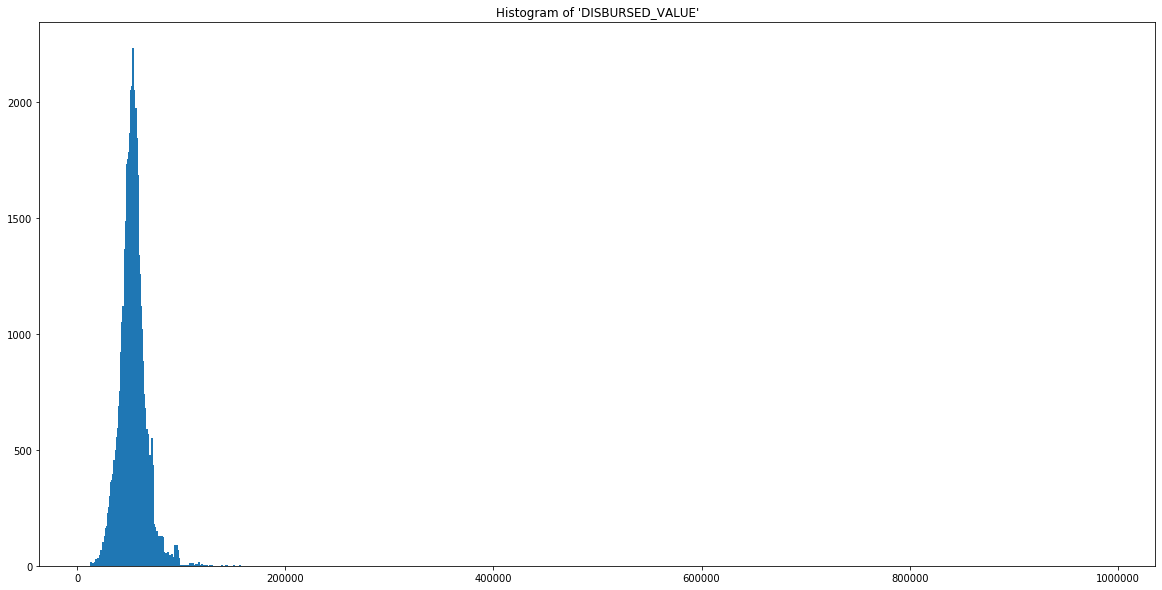

In [0]:
plot_histogram(df, "DISBURSED_VALUE", bins=1000, figsize=(20,10))

## Interactions between features

In [0]:
def plot_scatter(df, feat_names=['DISBURSED_VALUE', 'ASSET_COST'], figsize=(20,10)):
  if feat_names == []:
    return None
  data_multi = dict([
   (elem, df.select(elem).rdd \
   .flatMap(lambda row: row).collect())
   for elem in feat_names
  ])
  plt.figure(figsize=figsize)
  plt.scatter(data_multi[feat_names[0]], data_multi[feat_names[1]])
  plt.title('Scatterplot of \'{}\' against \'{}\''.format(feat_names[1], feat_names[0]))

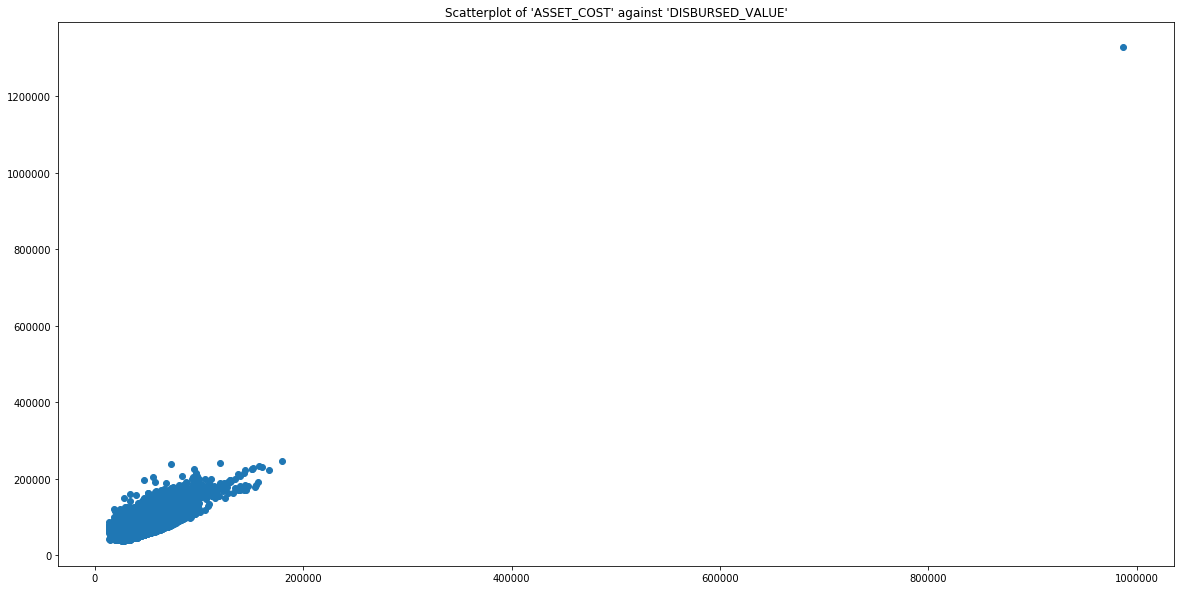

In [0]:
plot_scatter(df, ['DISBURSED_VALUE', 'ASSET_COST'])

Correlations:

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_cols, 
                            outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

In [0]:
pd.DataFrame(corrmatrix, columns=numeric_cols, index=numeric_cols)

Out[234]:

,DISBURSED_VALUE,ASSET_COST,LOAN_TO_VALUE,TOTAL_BALANCE_OUTSTANDING,TOTAL_SANCTIONED_AMT,TOTAL_DISBURSED_AMT,PRI_EMI,SEC_EMI
DISBURSED_VALUE,1.000000,0.750278,0.389003,0.011552,0.009837,0.010037,-0.006680,-0.006685
ASSET_COST,0.750278,1.000000,-0.293028,-0.008932,-0.009940,-0.010050,-0.007771,-0.005571
LOAN_TO_VALUE,0.389003,-0.293028,1.000000,0.027658,0.026570,0.026956,-0.001485,-0.001854
TOTAL_BALANCE_OUTSTANDING,0.011552,-0.008932,0.027658,1.000000,0.961773,0.964328,0.105198,0.004936
TOTAL_SANCTIONED_AMT,0.009837,-0.009940,0.026570,0.961773,1.000000,0.998103,0.108156,0.004604
TOTAL_DISBURSED_AMT,0.010037,-0.010050,0.026956,0.964328,0.998103,1.000000,0.108542,0.004274
PRI_EMI,-0.006680,-0.007771,-0.001485,0.105198,0.108156,0.108542,1.000000,0.013463
SEC_EMI,-0.006685,-0.005571,-0.001854,0.004936,0.004604,0.004274,0.013463,1.000000


Out[235]:

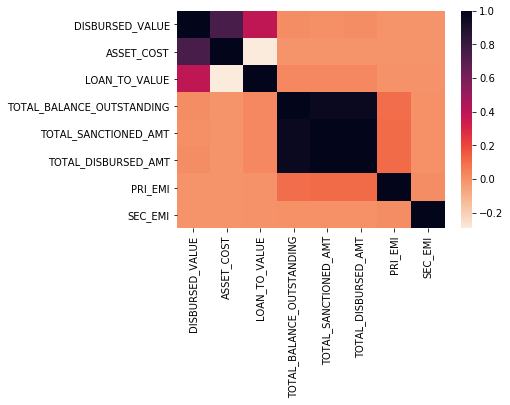

<matplotlib.axes._subplots.AxesSubplot at 0x7fa2276cdad0>

In [0]:
import seaborn as sns
sns.heatmap(corrmatrix, 
            xticklabels=numeric_cols,
            yticklabels=numeric_cols,
            cmap=sns.cm.rocket_r
           )

## Feature Transformation/Engineering

Drop columns that are unnecessary

Assumptions:

* Car brand do not really affect loan defaults (according to intuition)
* Employees have no effect on loan default (Unless there is fraud committed). That will be a different problem to tackle and tracking employee and adding it as a feature to train our model is not practical
* Specific branch and dealer does not contribute towards handing out loans that will default (safer choice would be to keep this variable but cardinality of this variable is high, to save computation cost, drop branch_id and dealer_id variables.

In [0]:
columns_to_drop = ['ID', 'MANUFACTURER_ID', 'BRANCH_ID', 'SUPPLIER_ID', 'PINCODE', 'EMPLOYEE_CODE_ID']
df = df.drop(*columns_to_drop)

Dealing with String Columns

In [0]:
from pyspark.sql.types import TimestampType
from datetime import datetime

def get_formatted_date(date_components, year_prefix):
  day = int(date_components[0])
  month = int(date_components[1])
  if date_components[2] == "00":
    year = 2000
  else:
    year = int(year_prefix + date_components[2])
  return datetime(year, month, day, 0, 0)

@pandas_udf(returnType=TimestampType())
def format_date(pd_date_str, year_prefix):
    pd_date_str = pd_date_str.str.split("/")
    return pd_date_str.apply(lambda x: get_formatted_date(x, year_prefix=year_prefix[0]))

In [0]:
df = df.withColumn('FORMATTED_DOB', format_date(df.DOB, lit('19')))
df = df.withColumn('FORMATTED_DISBURSED_DATE', format_date(df.DISBURSED_DATE, lit('20')))

In [0]:
df.select(["DOB", "FORMATTED_DOB", "DISBURSED_DATE", "FORMATTED_DISBURSED_DATE"]).take(5)

Out[239]: [Row(DOB='1/1/84', FORMATTED_DOB=datetime.datetime(1984, 1, 1, 0, 0), DISBURSED_DATE='3/8/18', FORMATTED_DISBURSED_DATE=datetime.datetime(2018, 8, 3, 0, 0)),
 Row(DOB='9/12/77', FORMATTED_DOB=datetime.datetime(1977, 12, 9, 0, 0), DISBURSED_DATE='26/9/18', FORMATTED_DISBURSED_DATE=datetime.datetime(2018, 9, 26, 0, 0)),
 Row(DOB='1/6/68', FORMATTED_DOB=datetime.datetime(1968, 6, 1, 0, 0), DISBURSED_DATE='16/9/18', FORMATTED_DISBURSED_DATE=datetime.datetime(2018, 9, 16, 0, 0)),
 Row(DOB='7/9/84', FORMATTED_DOB=datetime.datetime(1984, 9, 7, 0, 0), DISBURSED_DATE='3/9/18', FORMATTED_DISBURSED_DATE=datetime.datetime(2018, 9, 3, 0, 0)),
 Row(DOB='1/6/74', FORMATTED_DOB=datetime.datetime(1974, 6, 1, 0, 0), DISBURSED_DATE='30/8/18', FORMATTED_DISBURSED_DATE=datetime.datetime(2018, 8, 30, 0, 0))]

Find the difference between the 2 date columns to get Age

In [0]:
df = df.withColumn("BORROWER_AGE", floor(datediff("FORMATTED_DISBURSED_DATE", "FORMATTED_DOB")/365.25))

In [0]:
df = df.drop(*["DOB", "DISBURSED_DATE", "FORMATTED_DISBURSED_DATE", "FORMATTED_DOB"])

In [0]:
def convert_period_months(period_components):
  years = int(period_components[0][0])
  months = int(period_components[1][0])
  return years*12 + months

@pandas_udf(returnType=typ.IntegerType())
def convert_period_to_mths(pd_str):
    pd_str = pd_str.str.split(" ")
    return pd_str.apply(convert_period_months)

In [0]:
df = df.withColumn('FORMATTED_AVG_LOAN_TENURE', convert_period_to_mths(df.AVG_LOAN_TENURE))
df = df.withColumn('FORMATTED_CREDIT_HIST_LEN', convert_period_to_mths(df.CREDIT_HIST_LEN))

In [0]:
df.select(["AVG_LOAN_TENURE", "FORMATTED_AVG_LOAN_TENURE", "CREDIT_HIST_LEN", "FORMATTED_CREDIT_HIST_LEN"]).take(5)

Out[244]: [Row(AVG_LOAN_TENURE='0yrs 0mon', FORMATTED_AVG_LOAN_TENURE=0, CREDIT_HIST_LEN='0yrs 0mon', FORMATTED_CREDIT_HIST_LEN=0),
 Row(AVG_LOAN_TENURE='0yrs 0mon', FORMATTED_AVG_LOAN_TENURE=0, CREDIT_HIST_LEN='0yrs 0mon', FORMATTED_CREDIT_HIST_LEN=0),
 Row(AVG_LOAN_TENURE='1yrs 7mon', FORMATTED_AVG_LOAN_TENURE=19, CREDIT_HIST_LEN='1yrs 7mon', FORMATTED_CREDIT_HIST_LEN=19),
 Row(AVG_LOAN_TENURE='2yrs 1mon', FORMATTED_AVG_LOAN_TENURE=25, CREDIT_HIST_LEN='2yrs 3mon', FORMATTED_CREDIT_HIST_LEN=27),
 Row(AVG_LOAN_TENURE='1yrs 3mon', FORMATTED_AVG_LOAN_TENURE=15, CREDIT_HIST_LEN='2yrs 9mon', FORMATTED_CREDIT_HIST_LEN=33)]

In [0]:
df = df.drop(*["AVG_LOAN_TENURE", "CREDIT_HIST_LEN"])

Label Encoding String Categorical Variables

In [0]:
df_test = spark.createDataFrame(
    [(1, 'Not Scored: No Activity seen on the customer (Inactive)'), # create your data here, be consistent in the types.
     (2, 'F-Low Risk'),
     (3, 'I-Medium Risk'),
     (4, 'Not Scored: Only a Guarantor'),
     (5, 'Not Scored: No Updates available in last 36 months')
    ],
    ['ID', 'SCORE_CATEGORY'] # add your columns label here
)
df_test.withColumn('PROCESSED_SCORE_CATEGORY', regexp_replace('SCORE_CATEGORY', 'Not Scored: (.*)', 'Not Scored')).show()

+---+--------------------+------------------------+
 ID| SCORE_CATEGORY|PROCESSED_SCORE_CATEGORY|
+---+--------------------+------------------------+
 1|Not Scored: No Ac...| Not Scored|
 2| F-Low Risk| F-Low Risk|
 3| I-Medium Risk| I-Medium Risk|
 4|Not Scored: Only ...| Not Scored|
 5|Not Scored: No Up...| Not Scored|
+---+--------------------+------------------------+

In [0]:
df = df.withColumn('PROCESSED_SCORE_CATEGORY', regexp_replace('SCORE_CATEGORY', 'Not Scored: (.*)', 'Not Scored'))

In [0]:
df = df.drop('SCORE_CATEGORY')

In [0]:
# Label Encoding:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

str_cols = ['PROCESSED_SCORE_CATEGORY', 'EMP_TYPE']

indexers = [StringIndexer(inputCol=column, outputCol=column+"_INDEX").fit(df) for column in str_cols]

pipeline = Pipeline(stages=indexers)
df_le = pipeline.fit(df).transform(df)

In [0]:
df_le.select(['PROCESSED_SCORE_CATEGORY_INDEX', 'EMP_TYPE_INDEX']).take(5)

Out[254]: [Row(PROCESSED_SCORE_CATEGORY_INDEX=0.0, EMP_TYPE_INDEX=1.0),
 Row(PROCESSED_SCORE_CATEGORY_INDEX=0.0, EMP_TYPE_INDEX=0.0),
 Row(PROCESSED_SCORE_CATEGORY_INDEX=2.0, EMP_TYPE_INDEX=1.0),
 Row(PROCESSED_SCORE_CATEGORY_INDEX=5.0, EMP_TYPE_INDEX=1.0),
 Row(PROCESSED_SCORE_CATEGORY_INDEX=7.0, EMP_TYPE_INDEX=1.0)]

Dealing with Categorical Variables

In [0]:
from pyspark.ml.feature import OneHotEncoder

cat_cols = ['EMP_TYPE_INDEX', 'REGION_ID', 'PROCESSED_SCORE_CATEGORY_INDEX']

ohe_encoders = [OneHotEncoder(inputCol=column,
            outputCol="{0}_ENCODED".format(column)).fit(df_le) for column in cat_cols]

assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in ohe_encoders],outputCol="features")

pipeline = Pipeline(stages=ohe_encoders)
df_processed = pipeline.fit(df_le).transform(df_le)

In [0]:
# Drop all unneeded columns
unneeded_cols = cat_cols + str_cols
df_processed = df_processed.drop(*unneeded_cols)

In [0]:
df_processed.columns

Out[264]: ['DISBURSED_VALUE',
 'ASSET_COST',
 'LOAN_TO_VALUE',
 'MOBILENO_AVL_FLAG',
 'ID1_FLAG',
 'ID2_FLAG',
 'ID3_FLAG',
 'ID4_FLAG',
 'ID5_FLAG',
 'BUREAU_SCORE',
 'PRI_ACCS',
 'ACTIVE_ACCS',
 'OVERDUE_ACCS',
 'TOTAL_BALANCE_OUTSTANDING',
 'TOTAL_SANCTIONED_AMT',
 'TOTAL_DISBURSED_AMT',
 'SEC_ACCS',
 'SEC_ACTIVE_ACCS',
 'SEC_OVERDUE_ACCS',
 'SEC_TOTAL_BALANCE_OUTSTANDING',
 'SEC_TOTAL_SANCTIONED_AMT',
 'SEC_TOTAL_DISBURSED_AMT',
 'PRI_EMI',
 'SEC_EMI',
 'LOANS_6_MTHS',
 'LOANS_DEFAULT_6_MTHS',
 'INQUIRIES',
 'DEFAULT',
 'BORROWER_AGE',
 'FORMATTED_AVG_LOAN_TENURE',
 'FORMATTED_CREDIT_HIST_LEN',
 'EMP_TYPE_INDEX_ENCODED',
 'REGION_ID_ENCODED',
 'PROCESSED_SCORE_CATEGORY_INDEX_ENCODED']

## Building Machine Learning Models using spark.ml

In [0]:
# train, test, val = df_processed.randomSplit([0.6, 0.2, 0.2], seed=666)
seed = 42 
fractions = df_processed.select("DEFAULT").distinct().withColumn("fraction", lit(0.8)).rdd.collectAsMap()
print(fractions)                                                            
# {0: 0.6, 1: 0.6}
train_df = df_processed.stat.sampleBy("DEFAULT", fractions, seed)

{1: 0.8, 0: 0.8}

In [0]:
# test_valid_df = df_processed.subtract(train_df)
# fractions = test_valid_df.select("DEFAULT").distinct().withColumn("fraction", lit(0.5)).rdd.collectAsMap()
# print(fractions)   
# valid_df = test_valid_df.stat.sampleBy("DEFAULT", fractions, seed)
# test_df = test_valid_df.subtract(valid_df)

In [0]:
test_df = df_processed.subtract(train_df)

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler_inputs = [c for c in df_processed.columns if c != 'DEFAULT']
vec_assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
train_df = vec_assembler.transform(train_df).drop(*assembler_inputs)

In [0]:
test_df = vec_assembler.transform(test_df).drop(*assembler_inputs)

Training model using hyperparameter tuning

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10, featuresCol='features', labelCol='DEFAULT')

grid =  (ParamGridBuilder() \
         .addGrid(gbt.maxDepth, [2, 4, 6, 8, 10, 12]) \
         .addGrid(gbt.maxBins, [10, 20, 30, 40, 50, 60]) \
         .addGrid(gbt.maxIter, [10, 30, 50, 70, 90, 100]) \
         .build())

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='DEFAULT')

In [0]:
cv = CrossValidator(
 estimator=gbt,
 estimatorParamMaps=grid,
 evaluator=evaluator
)

In [0]:
cv_model = cv.fit(train_df)

In [0]:
results = cv_model.transform(test_df)
print(evaluator.evaluate(results,
 {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(results,
 {evaluator.metricName: 'areaUnderPR'}))

For the confusion matrix, Predicted classes are in columns, rows are the actual labels

In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics

#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels = results.select(['prediction','DEFAULT']).withColumn('label', col('DEFAULT').cast(typ.FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

In [0]:
results = [
   (
     [
       {key.name: paramValue}
       for key, paramValue
       in zip(
       params.keys(),
       params.values())
     ], metric
     )
       for params, metric
       in zip(
       cvModel.getEstimatorParamMaps(),
       cvModel.avgMetrics
     ) 
  ]
sorted(results,
  key=lambda el: el[1],
  reverse=True)[0]